In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# Using Numeric Data Only

In [5]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# Installing libraries for plotting

%%capture
! pip install ipywidgets

UsageError: Line magic function `%%capture` not found.


In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual

# Defining Functions for Plotting

In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [10]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

In [12]:
y_data = df["price"]
x_data = df.drop('price',axis=1)

## Splitting the Dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x_data , y_data , test_size = 0.10 , random_state = 0)

In [15]:
x_test.shape[0]

21

In [16]:
x_train.shape[0]

180

In [17]:
# Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".

from sklearn.model_selection import train_test_split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split (x_data , y_data , test_size = 0.40 , random_state = 0)

In [20]:
x_test1.shape[0]

81

In [21]:
x_train1.shape[0]

120

## Model Fitting

In [23]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(x_train[["horsepower"]],y_train)

LinearRegression()

In [24]:
lre.score(x_test[["horsepower"]],y_test)

0.7340722810055448

In [25]:
lre.score(x_train[['horsepower']], y_train)

0.6479796296498318

In [26]:
# Find the R^2 on the test data using 40% of the data for training data.

from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(x_train1[["horsepower"]],y_train1)

LinearRegression()

In [27]:
lr2.score(x_train1[["horsepower"]],y_train1)

0.5754067463583004

In [28]:
lr2.score(x_test1[["horsepower"]],y_test1)

0.7139364665406973

## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score (lre , x_data[["horsepower"]] , y_data , cv = 4)
scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [31]:
np.mean(scores)

0.522009915042119

In [33]:
scores.std()

0.2911839444756029

In [34]:
# Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature.

from sklearn.model_selection import cross_val_score
scores1 = cross_val_score (lr2 , x_data[["horsepower"]] , y_data , cv = 2)
np.mean (scores)

0.522009915042119

## Cross Validation Prediction

In [36]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict (lre , x_data[["horsepower"]] , y_data , cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Part 2: Overfitting and Under-Fitting

## Prediction Using Training Data

In [38]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [39]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([12467.61075244, 34739.93096505,  7447.00471332, 10611.58446885,
       24051.10584433])

## Prediction Using Test Data

In [42]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([12467.61075244, 34739.93096505,  7447.00471332, 10611.58446885,
       24051.10584433])

## Visual Evaluation

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


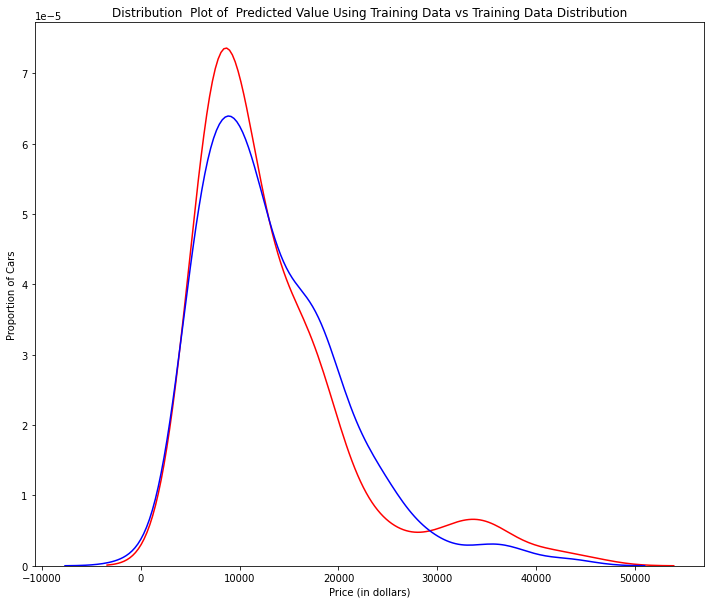

In [45]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


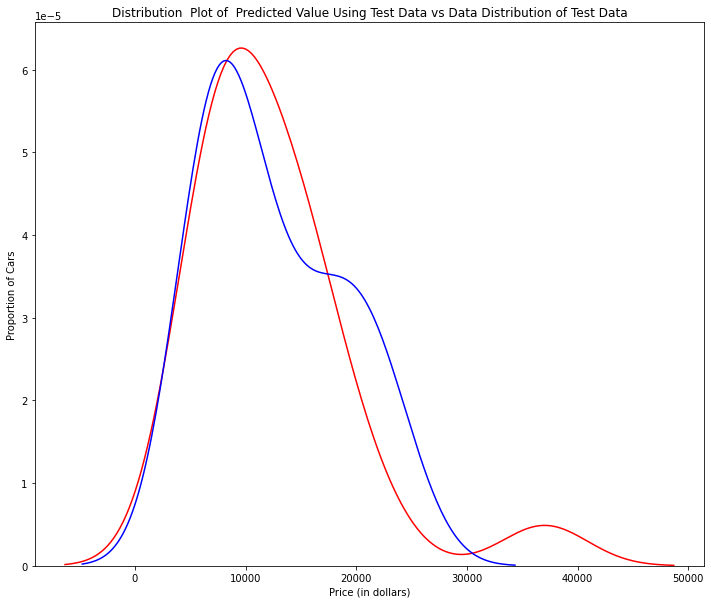

In [46]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [47]:
# Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
# Using 55% as training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

## Fitting a Polynomial

In [50]:
# We will perform a degree 5 polynomial transformation on the feature 'horse power'.

In [52]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
poly = LinearRegression()   # Create a Model "poly" and train it.
poly.fit(x_train_pr, y_train)

LinearRegression()

In [53]:
# See the output:

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

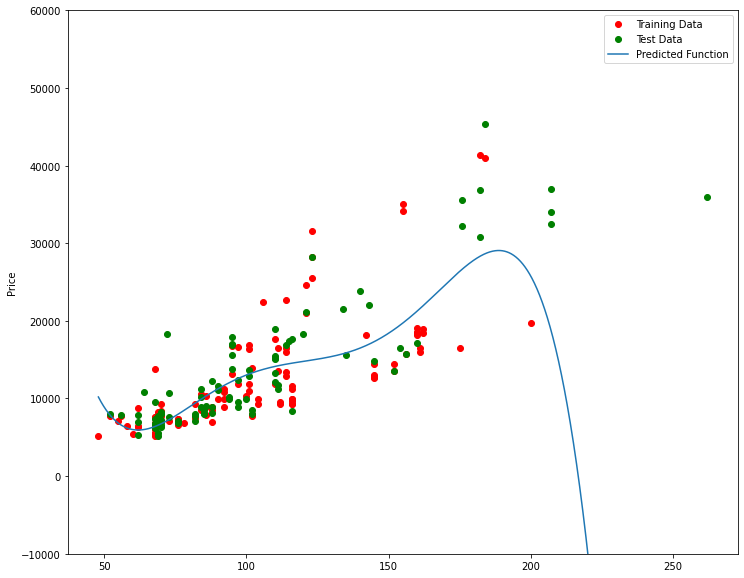

In [54]:
# Using the previously defined function 'PollyPlot' to plot the details.

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [55]:
# Red dots represent training data, green dots represent test data, and the blue line represents the model prediction. We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


In [56]:
poly.score(x_train_pr, y_train)

0.5567716902121724

In [57]:
poly.score(x_test_pr, y_test)

-29.871340540625788

In [58]:
# We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

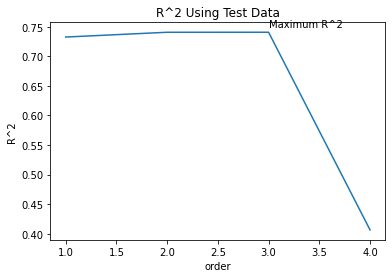

In [59]:
# Alogrithm for Trial-and-Error of R^2

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [60]:
# We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [61]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [62]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [63]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

pr1 = PolynomialFeatures(degree=2)

In [65]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

x_train_pr1 = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])  
x_test_pr1 = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])   


In [68]:
# How many dimensions does the new feature have? Hint: use the attribute "shape".

x_train_pr1.shape

(110, 70)

In [69]:
x_test_pr1.shape

(91, 70)

In [70]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


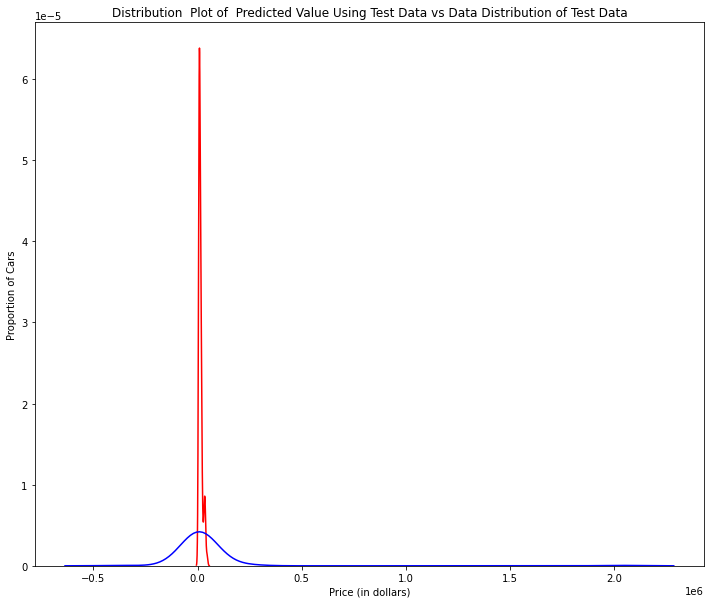

In [71]:
# Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data?

yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [72]:
# Using the distribution plot above, explain in words about the two regions were the predicted prices are less accurate than the actual prices.

# EXPLANATION:
# The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

# Part 3: Ridge Regression

## Performing a 2-Degree Polynomial Transform

In [75]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

## Ridge Regression Model Development and Training

In [77]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge (alpha = 0.1)
RidgeModel.fit (x_train_pr , y_train)
Yhat = RidgeModel.predict (x_train_pr)

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [80]:
yhat = RidgeModel.predict(x_test_pr)

## Function for Alpha Selection

In [82]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

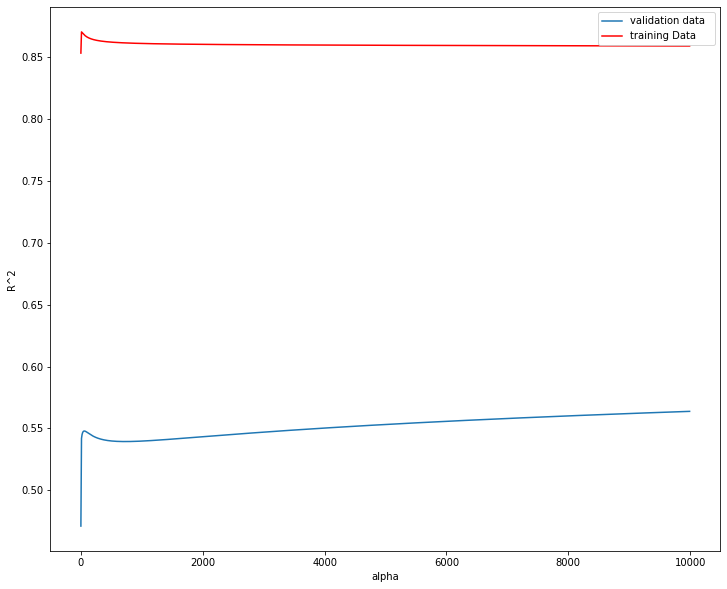

In [84]:
# We can plot out the value of R^2 for different Alphas.

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [85]:
# The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

In [86]:
# Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to 10.

from sklearn.linear_model import Ridge
RidgeModel = Ridge (alpha = 10)
RidgeModel.fit (x_train_pr , y_train)
RidgeModel.score(x_test_pr , y_test)

0.5418576440206702

# Part 4: Grid Search

In [88]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters.

In [92]:
from sklearn.model_selection import GridSearchCV
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)

In [95]:
score = Grid2.cv_results_
score["mean_test_score"]

array([ 0.66516228,  0.66459248,  0.69342286,  0.66459305,  0.69000509,
        0.66459827,  0.32125534,  0.66465008,  0.01692457,  0.66513615,
       -0.03033714,  0.66808959, -0.03531091,  0.67249168, -0.03581087,
        0.6569726 , -0.03581087,  0.6569726 ])

In [90]:
# This is without the normalization part.

from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [91]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152